In [31]:
import numpy as np

import matching.glema.common.utils.arg_utils as arg_utils
import matching.glema.common.utils.graph_utils as graph_utils
import matching.glema.common.utils.model_utils as model_utils
import matching.glema.common.utils.plot_utils as plot_utils
import matching.misc.cpg_const as cpg_const
from matching.glema.common.model import InferenceGNN

In [32]:
args = arg_utils.parse_args( use_default=True )

args.dataset = "CPG_augm"
args.directed = False
args.anchored = True
version = model_utils.get_latest_model_version( args )
model_name = model_utils.get_model_name( args, version )

args = arg_utils.load_args( args, model_name )
args.iso = True
args.test_data = True

In [33]:
model = InferenceGNN( args )

Loading model from /Users/jeanjour/Documents/projects/python/dpd-subgraph-matching/matching/glema/training/save/CPG_augm_undirected_anchored_v2/model.pt ...


In [34]:
def predict( model, G_source, G_query ) -> float:
    results = model.predict_label( [ G_query ], [ G_source ] )
    return results[ 0 ].item()


def is_subgraph( model, G_source, G_query, conf=0.5 ) -> bool:
    prediction = predict( model, G_source, G_query )
    is_sub = prediction > conf
    print( f"query is subgraph of source: {is_sub} [{prediction:.3}]" )
    return is_sub

In [35]:
record_scopes = graph_utils.get_record_scopes( args )
design_patterns = graph_utils.get_design_patterns( args )
label_args = {
    "record_scopes": record_scopes,
    "design_patterns": design_patterns
}

In [36]:
source_graphs = graph_utils.load_source_graphs( args )
pattern_graphs = graph_utils.get_pattern_graphs( args, source_graphs )
{ dp.value: len( l ) for dp, l in pattern_graphs.items() }

{'OBSERVER': 18, 'BUILDER': 12, 'ABSTRACT_FACTORY': 16}

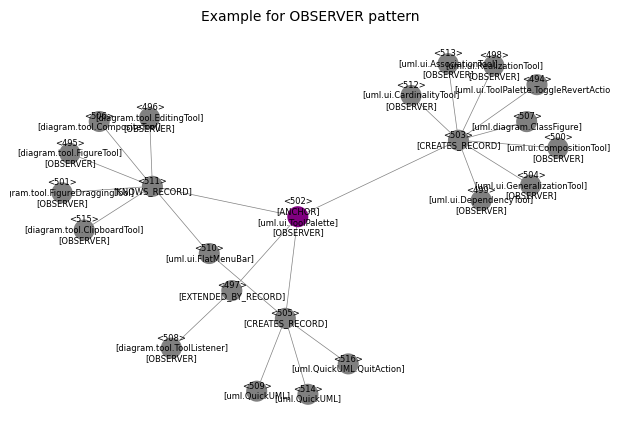

In [37]:
dp_target = cpg_const.DesignPatternType.OBSERVER
dp_target_graph = pattern_graphs[ dp_target ][ 2 ]

plot_utils.plot_graph( dp_target_graph,
                       title=f"Example for {dp_target.value} pattern",
                       nodeColors=graph_utils.get_node_colors( dp_target_graph ),
                       nodeLabels=graph_utils.get_node_labels( dp_target_graph, **label_args ) )

In [38]:
def has_pattern( model, graph, pattern_graphs, pattern_type, conf=0.5 ):
    preds = list()
    pattern_type_queries = pattern_graphs[ pattern_type ]
    for query in pattern_type_queries:
        graph_anchor = graph_utils.get_anchor( graph )
        graph_r = graph_utils.max_spanning_radius( graph, graph_anchor )

        query_anchor = graph_utils.get_anchor( query )
        query_r = max( 1, int( graph_r / 2 ) )
        #query_r = graph_r - 1
        query = graph_utils.subgraph( query, query_anchor, query_r )
        query_r = graph_utils.max_spanning_radius( query, query_anchor )

        print( f"graph_r: {graph_r} / query_r: {query_r}" )

        matching_colors = {
            2: "purple",
            1: "green",
            0: "grey",
            -1: "red"
        }
        combined, node_colors, edge_colors = graph_utils.combine_graph( graph, query,
                                                                        matching_colors=matching_colors )
        plot_utils.plot_graph(
            title="Combined Graph", graph=combined,
            nodeColors=node_colors, edgeColors=edge_colors,
            nodeLabels=graph_utils.get_node_labels( combined )
        )

        is_subgraph( model, graph, query, conf=conf )
        pred = predict( model, graph, query )
        preds.append( pred )

    preds = np.array( preds )
    mean = np.mean( preds )
    median = np.median( preds )
    var = np.var( preds )
    std = np.std( preds )
    print( f"Total predictions is {mean > conf}: mean[{mean:.3}] median[{median:.3}] var[{var:.3}] std[{std:.3}]" )

graph_r: 4 / query_r: 2


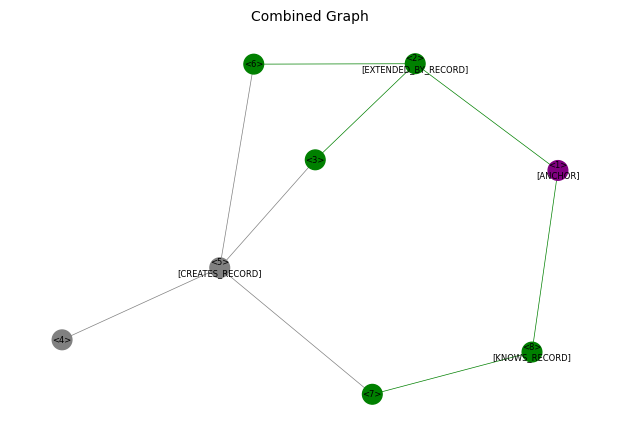

query is subgraph of source: True [0.953]
graph_r: 4 / query_r: 2


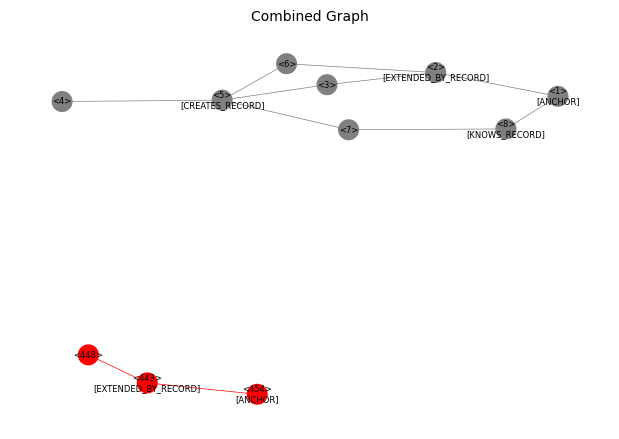

query is subgraph of source: True [0.995]
graph_r: 4 / query_r: 2


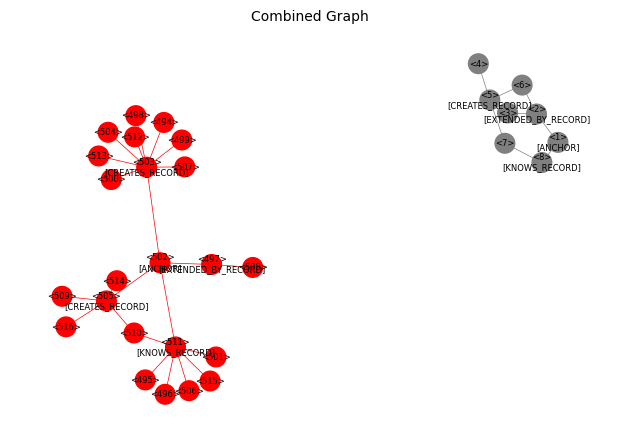

query is subgraph of source: False [3.87e-17]
graph_r: 4 / query_r: 2


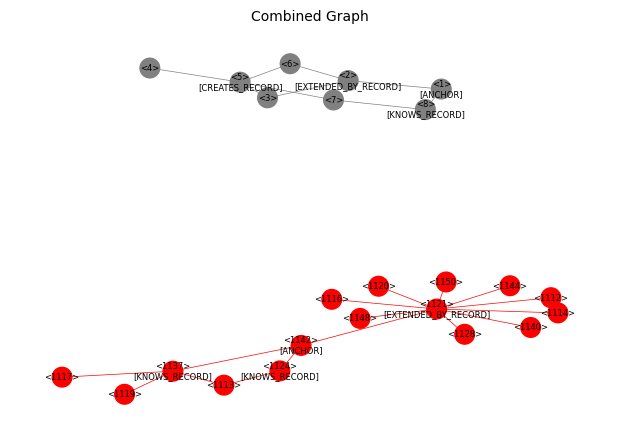

query is subgraph of source: False [1.11e-17]
graph_r: 4 / query_r: 2


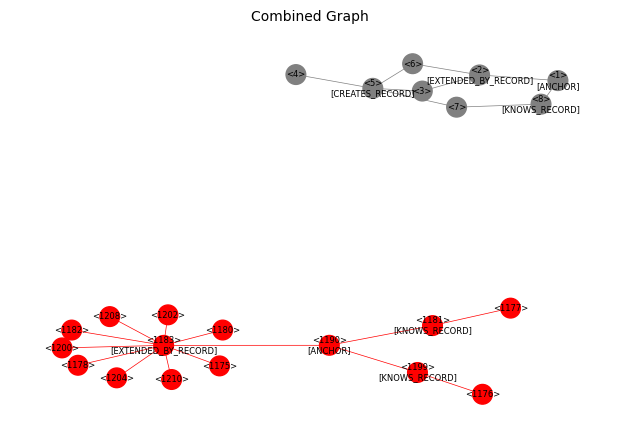

query is subgraph of source: False [5.91e-18]
graph_r: 4 / query_r: 2


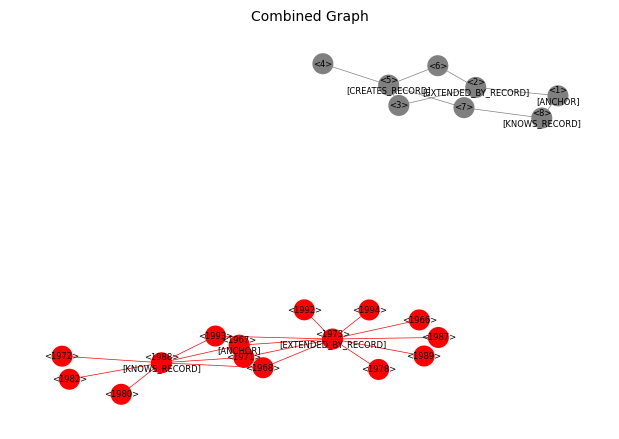

query is subgraph of source: False [4.17e-17]
graph_r: 4 / query_r: 2


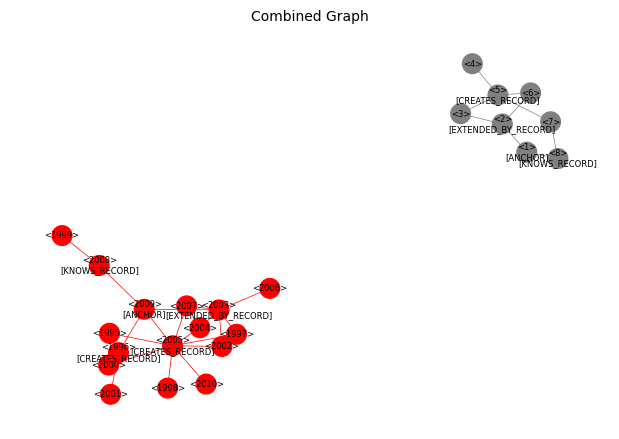

query is subgraph of source: False [2.98e-18]
graph_r: 4 / query_r: 2


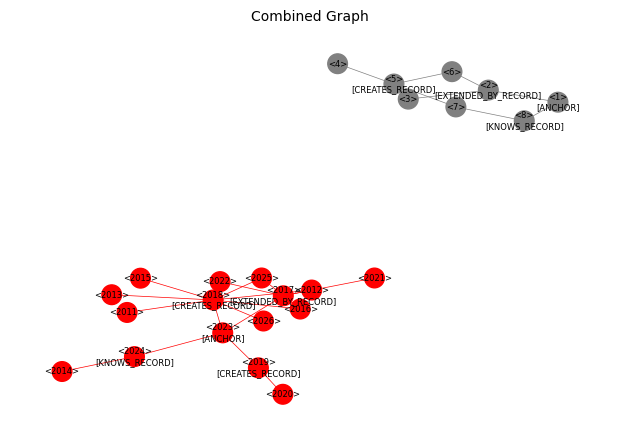

query is subgraph of source: False [2.98e-18]
graph_r: 4 / query_r: 2


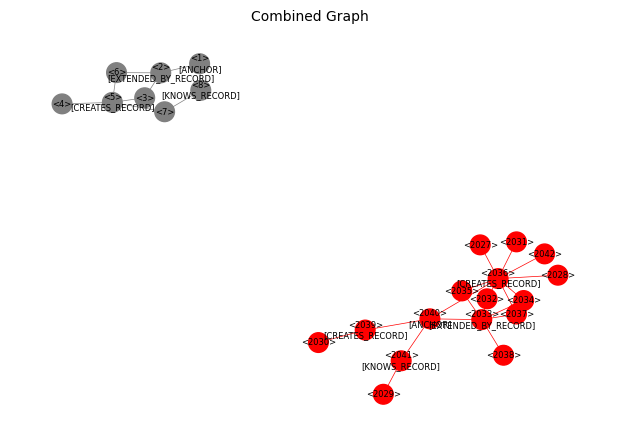

query is subgraph of source: False [2.98e-18]
graph_r: 4 / query_r: 2


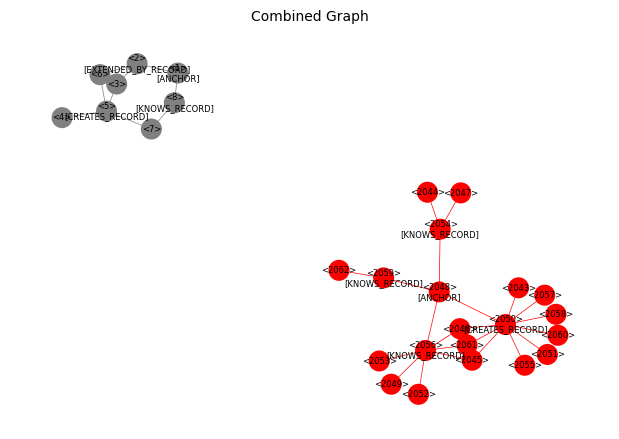

query is subgraph of source: False [3.65e-17]
graph_r: 4 / query_r: 2


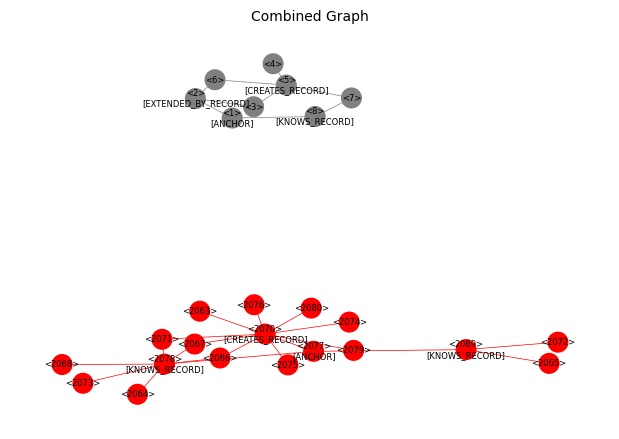

query is subgraph of source: False [1.72e-17]
graph_r: 4 / query_r: 2


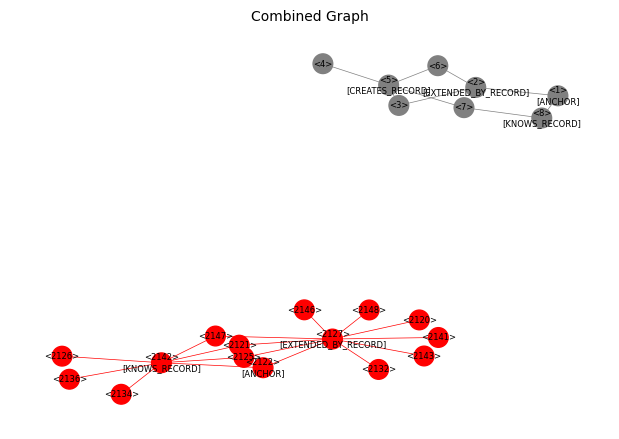

query is subgraph of source: False [4.17e-17]
graph_r: 4 / query_r: 2


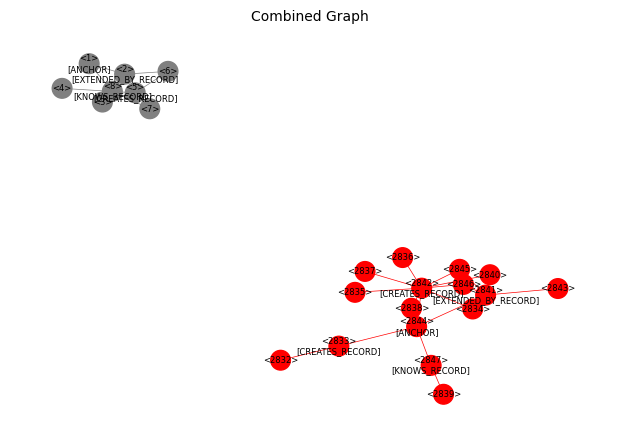

query is subgraph of source: False [2.98e-18]
graph_r: 4 / query_r: 2


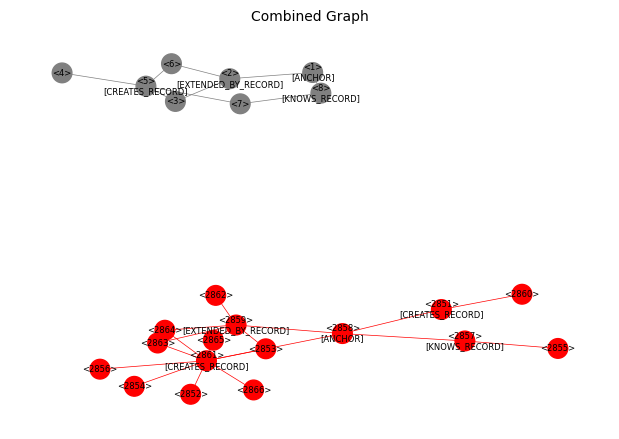

query is subgraph of source: False [2.98e-18]
graph_r: 4 / query_r: 2


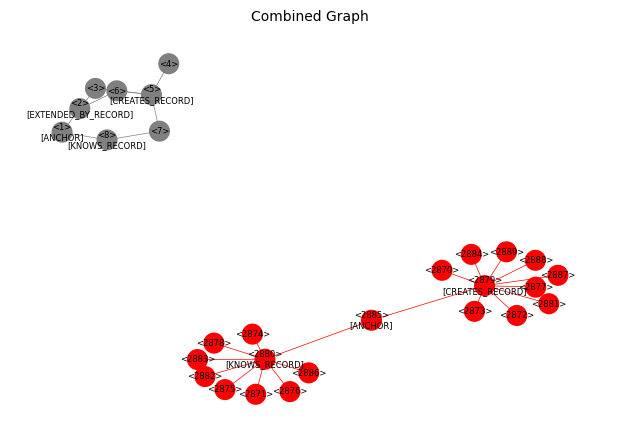

query is subgraph of source: False [1.37e-16]
graph_r: 4 / query_r: 2


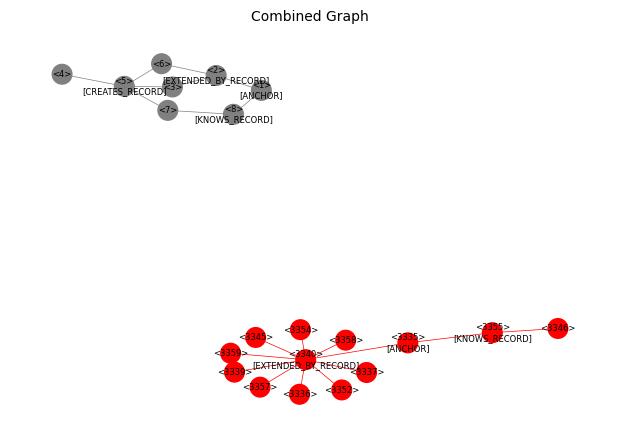

query is subgraph of source: False [9.88e-18]
graph_r: 4 / query_r: 2


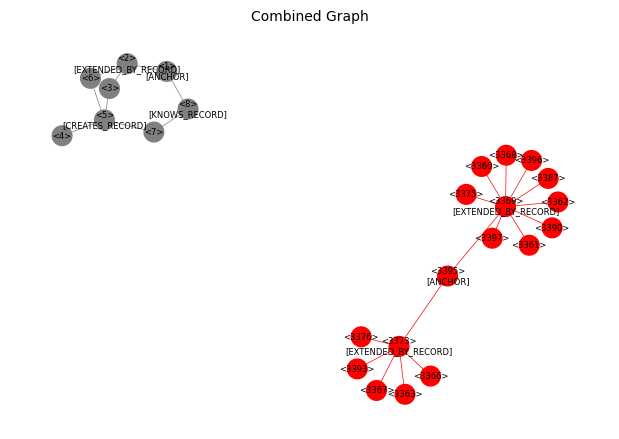

query is subgraph of source: False [1.42e-17]
graph_r: 4 / query_r: 2


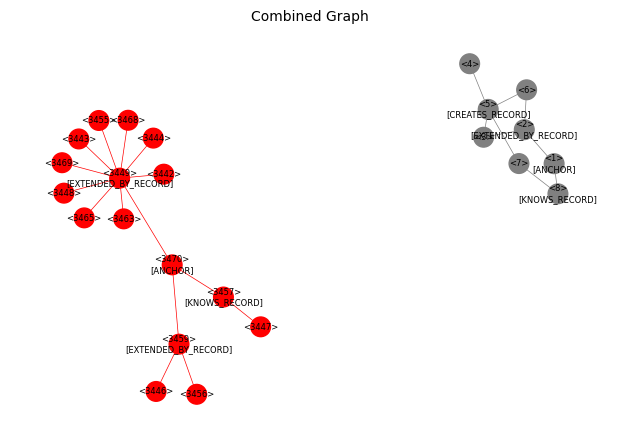

query is subgraph of source: False [1.01e-17]
Total predictions is False: mean[0.108] median[1.26e-17] var[0.0937] std[0.306]


In [39]:
source_graph = pattern_graphs[ dp_target ][ 0 ]
has_pattern( model, source_graph, pattern_graphs, dp_target, conf=0.5 )

graph_r: 4 / query_r: 2


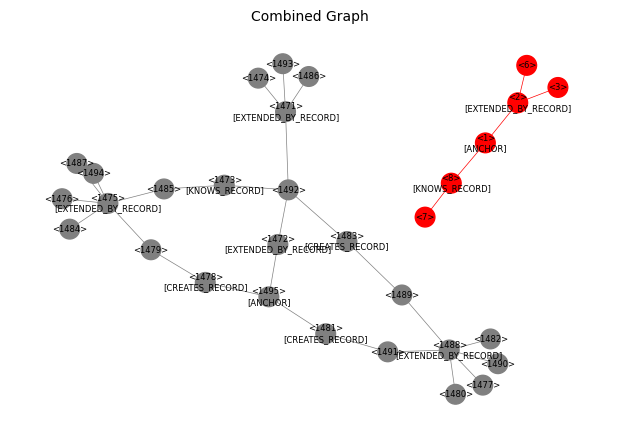

query is subgraph of source: True [0.937]
graph_r: 4 / query_r: 2


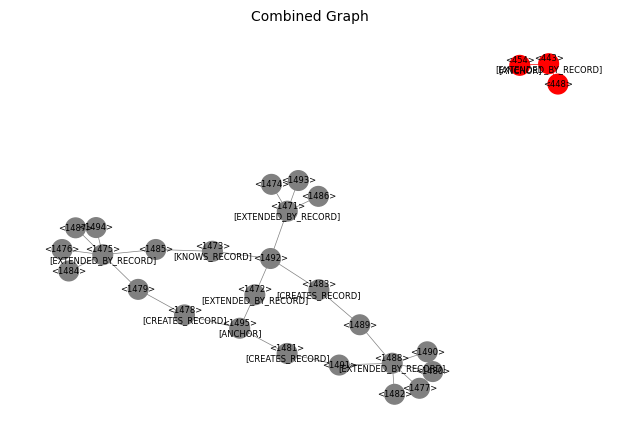

query is subgraph of source: True [0.923]
graph_r: 4 / query_r: 2


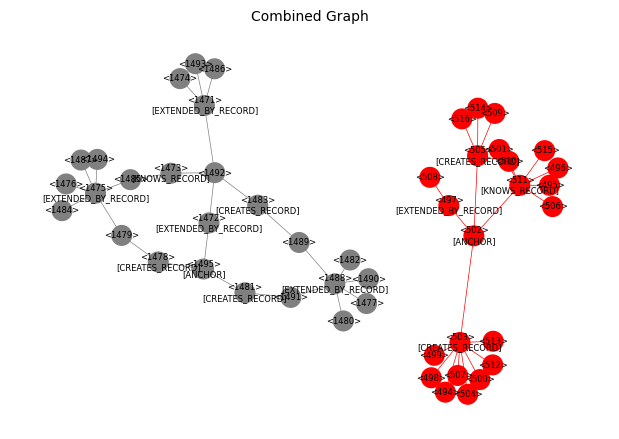

query is subgraph of source: True [0.891]
graph_r: 4 / query_r: 2


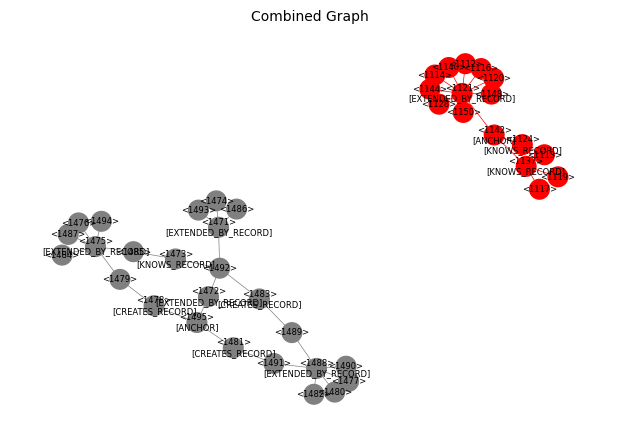

query is subgraph of source: False [0.000235]
graph_r: 4 / query_r: 2


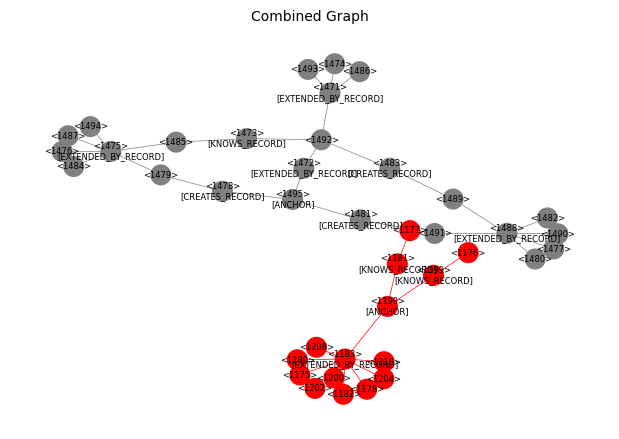

query is subgraph of source: False [7.42e-05]
graph_r: 4 / query_r: 2


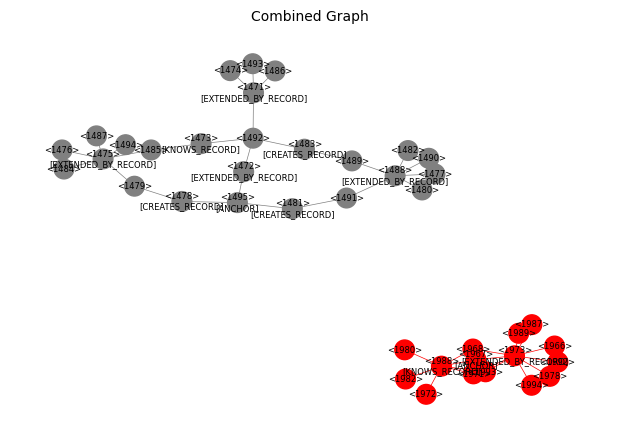

query is subgraph of source: True [0.886]
graph_r: 4 / query_r: 2


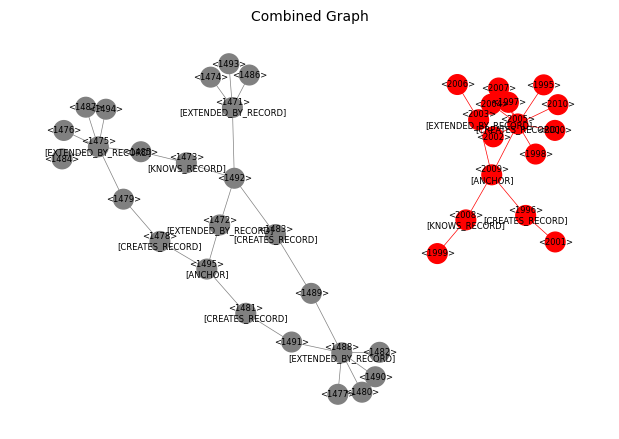

query is subgraph of source: True [0.899]
graph_r: 4 / query_r: 2


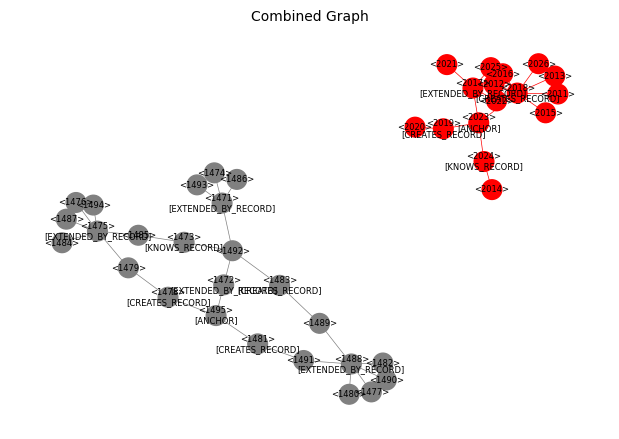

query is subgraph of source: True [0.899]
graph_r: 4 / query_r: 2


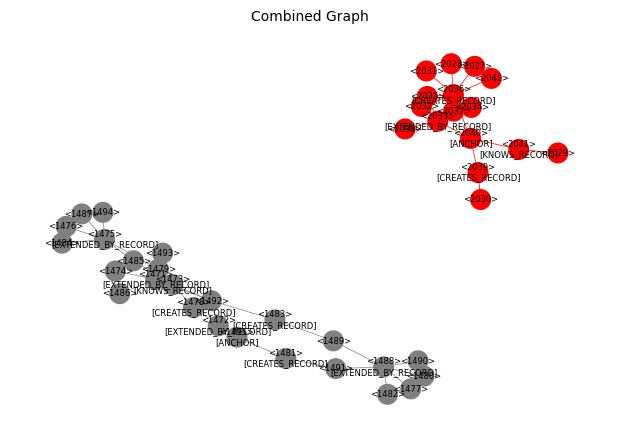

query is subgraph of source: True [0.899]
graph_r: 4 / query_r: 2


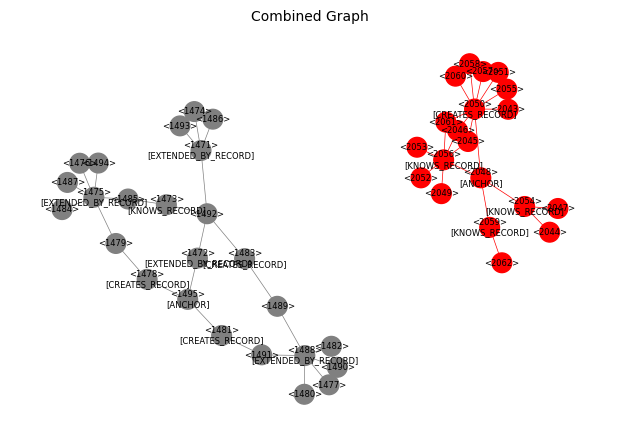

query is subgraph of source: False [4.28e-09]
graph_r: 4 / query_r: 2


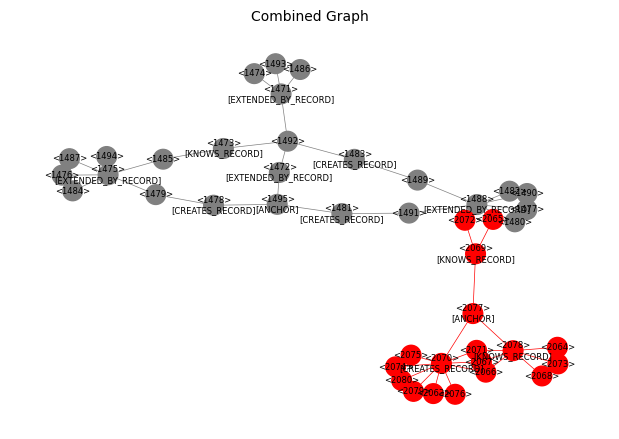

query is subgraph of source: False [0.00854]
graph_r: 4 / query_r: 2


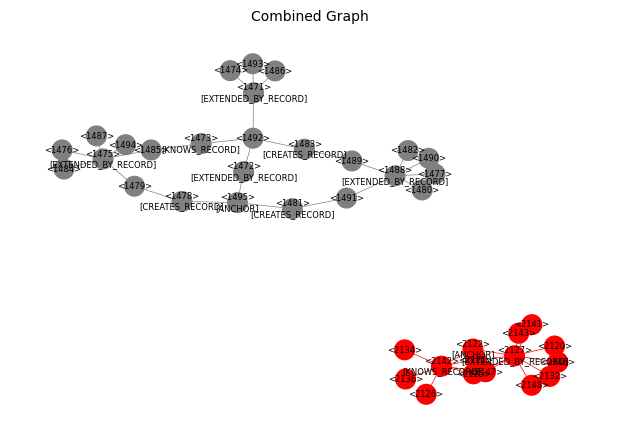

query is subgraph of source: True [0.886]
graph_r: 4 / query_r: 2


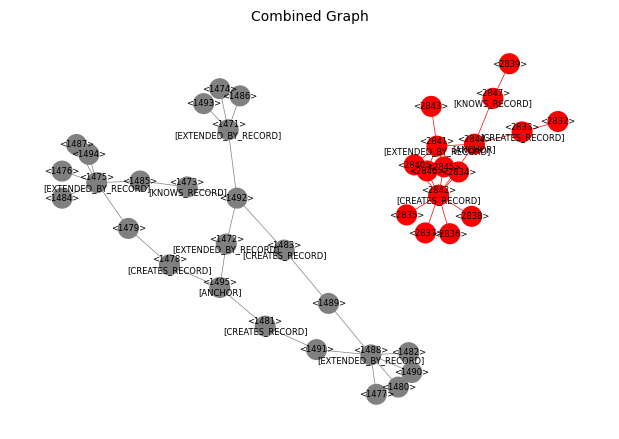

query is subgraph of source: True [0.899]
graph_r: 4 / query_r: 2


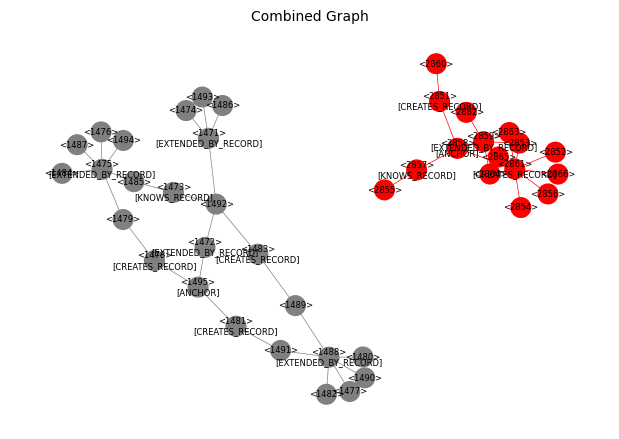

query is subgraph of source: True [0.899]
graph_r: 4 / query_r: 2


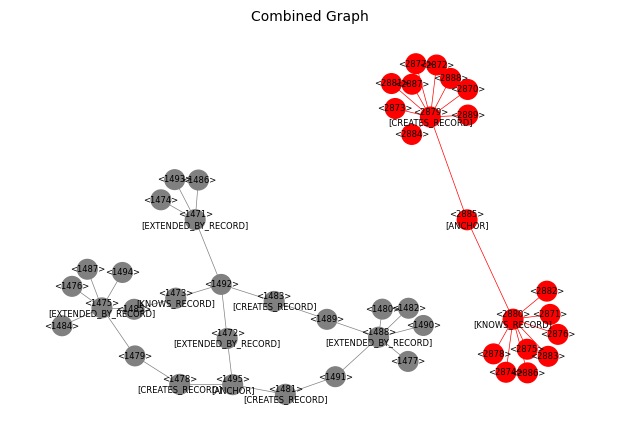

query is subgraph of source: True [0.734]
graph_r: 4 / query_r: 2


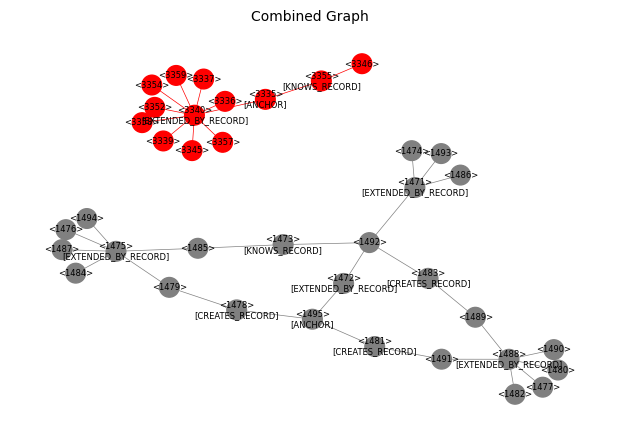

query is subgraph of source: True [0.923]
graph_r: 4 / query_r: 2


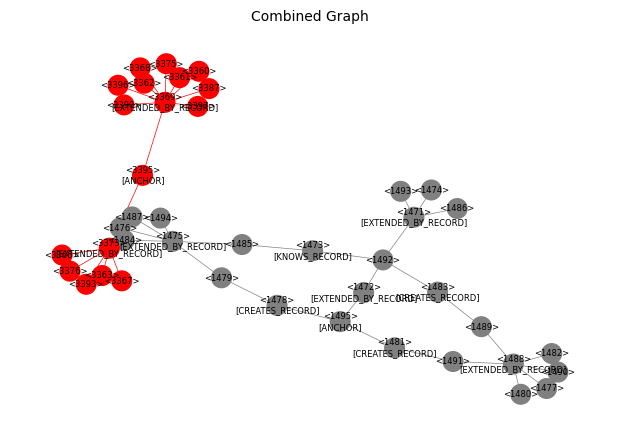

query is subgraph of source: True [0.966]
graph_r: 4 / query_r: 2


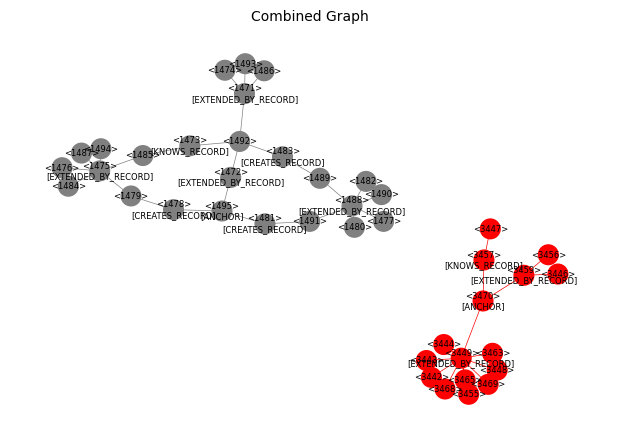

query is subgraph of source: True [0.984]
Total predictions is True: mean[0.702] median[0.899] var[0.142] std[0.377]


In [40]:
source_graph = pattern_graphs[ cpg_const.DesignPatternType.ABSTRACT_FACTORY ][ 0 ]
has_pattern( model, source_graph, pattern_graphs, dp_target, conf=0.5 )